In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input, Add

import nltk
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import gdown

image_url = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip"
caption_url = "https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip"

os.makedirs("flickr8k", exist_ok=True)

image_zip_path = "flickr8k/Flickr8k_Dataset.zip"
gdown.download(image_url, image_zip_path, quiet=False)

caption_zip_path = "flickr8k/Flickr8k_text.zip"
gdown.download(caption_url, caption_zip_path, quiet=False)

with zipfile.ZipFile(image_zip_path, "r") as zip_ref:
    zip_ref.extractall("flickr8k/")

with zipfile.ZipFile(caption_zip_path, "r") as zip_ref:
    zip_ref.extractall("flickr8k/")

print("Dataset downloaded and extracted.")


Downloading...
From: https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
To: /content/flickr8k/Flickr8k_Dataset.zip
100%|██████████| 1.12G/1.12G [00:05<00:00, 186MB/s]
Downloading...
From: https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip
To: /content/flickr8k/Flickr8k_text.zip
100%|██████████| 2.34M/2.34M [00:00<00:00, 84.8MB/s]


Dataset downloaded and extracted.


In [6]:
caption_file = "/content/flickr8k/Flickr8k.token.txt"
captions = open(caption_file, 'r').read().split("\n")

image_captions = {}
for line in captions:
    tokens = line.split("\t")
    if len(tokens) < 2:
        continue
    image_id, caption = tokens[0].split("#")[0], tokens[1].lower()
    if image_id not in image_captions:
        image_captions[image_id] = []
    image_captions[image_id].append("startseq " + caption.strip() + " endseq")

image_list = list(image_captions.keys())[:1000]
image_captions = {img: image_captions[img] for img in image_list}

print(f"Selected {len(image_captions)} images.")


Selected 1000 images.


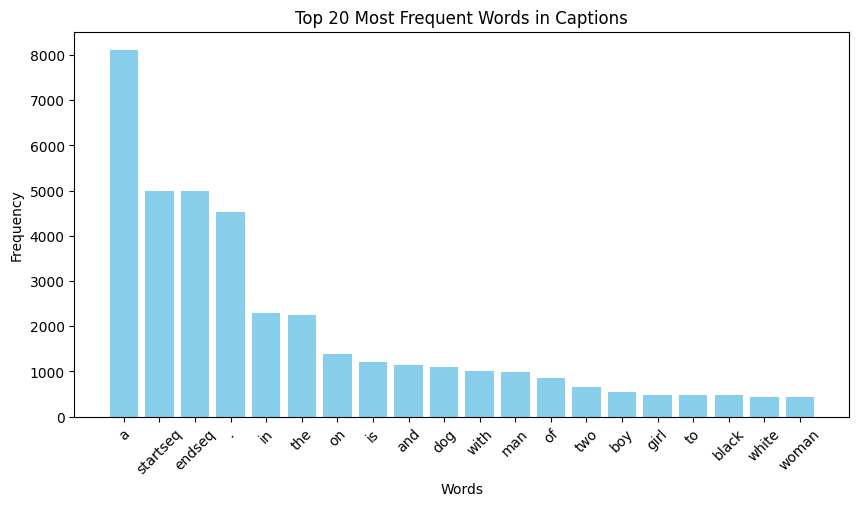

In [19]:
from collections import Counter

word_counts = Counter()
for caption in all_captions:
    word_counts.update(caption.split())

top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Captions")
plt.show()


In [8]:
inception = InceptionV3(weights="imagenet")
model_new = Model(inception.input, inception.layers[-2].output)

def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(299, 299))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return preprocess_input(img)

image_features = {}
image_folder = "/content/flickr8k/Flicker8k_Dataset"
for img_name in image_list:
    img_path = os.path.join(image_folder, img_name)
    img = preprocess_image(img_path)
    feature = model_new.predict(img)
    image_features[img_name] = feature.flatten()

print("Extracted features for 1500 images.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━

In [9]:
all_captions = []
for key in image_captions.keys():
    all_captions.extend(image_captions[key])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)

max_length = max(len(c.split()) for c in all_captions)
vocab_size = len(tokenizer.word_index) + 1

print(f"Vocabulary Size: {vocab_size}, Max Caption Length: {max_length}")


Vocabulary Size: 3224, Max Caption Length: 37


In [10]:
image_input = Input(shape=(2048,))
img_embedding = Dense(256, activation="relu")(image_input)

caption_input = Input(shape=(max_length,))
caption_embedding = Embedding(vocab_size, 256, mask_zero=True)(caption_input)
lstm_output = LSTM(256)(caption_embedding)

merged = Add()([img_embedding, lstm_output])
dense_output = Dense(256, activation="relu")(merged)
output = Dense(vocab_size, activation="softmax")(dense_output)

captioning_model = Model(inputs=[image_input, caption_input], outputs=output)
captioning_model.compile(loss="categorical_crossentropy", optimizer="adam")

captioning_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 37)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 2048)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 37, 256)        │        825,344 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 37)             │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        524,544 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 256)            │        525,312 │ embedding[0][0],       │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 256)            │              0 │ dense[0][0],           │
│                           │                        │                │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 256)            │         65,792 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 3224)           │        828,568 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,769,560 (10.57 MB)

 Trainable params: 2,769,560 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
X_image, X_text, y = [], [], []

for img, captions in image_captions.items():
    img_feature = image_features[img]
    for caption in captions:
        sequence = tokenizer.texts_to_sequences([caption])[0]
        for i in range(1, len(sequence)):
            X_image.append(img_feature)
            X_text.append(sequence[:i])
            y.append(sequence[i])

X_image = np.array(X_image)
X_text = pad_sequences(X_text, maxlen=max_length, padding='post')
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

print("Training data prepared.")


Training data prepared.


Epoch 1/10
1881/1881 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 4.8298
Epoch 2/10
1881/1881 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 3.5534
Epoch 3/10
1881/1881 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 3.1610
Epoch 4/10
1881/1881 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 2.8533
Epoch 5/10
1881/1881 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 2.5842
Epoch 6/10
1881/1881 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 2.3086
Epoch 7/10
1881/1881 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.0608
Epoch 8/10
1881/1881 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 1.8575
Epoch 9/10
1881/1881 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 1.6362
Epoch 10/10
1881/1881 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 1.4691


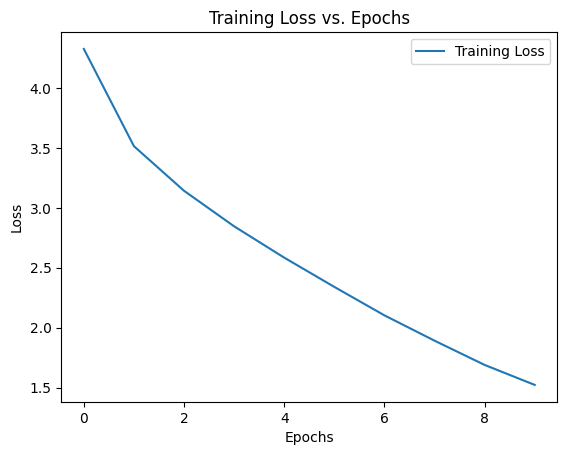

In [12]:
history = captioning_model.fit([X_image, X_text], y, epochs=10, batch_size=32, verbose=1)

plt.plot(history.history['loss'], label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs. Epochs")
plt.legend()
plt.show()


In [13]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plot training & validation loss and accuracy.
    """
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history.get('val_loss', []), label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history.get('accuracy', []), label='Training Accuracy', color='blue')
    plt.plot(history.history.get('val_accuracy', []), label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    plt.show()


In [14]:
def generate_caption(model, image, tokenizer, max_length):
    caption = "startseq"
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([caption])[0]
        sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
        y_pred = model.predict([image, sequence])
        word = tokenizer.index_word[np.argmax(y_pred)]
        caption += " " + word
        if word == "endseq":
            break
    return caption.replace("startseq", "").replace("endseq", "").strip()


In [15]:
# Test on sample images
for i, img_name in enumerate(image_list[:5]):
    test_img = preprocess_image(os.path.join(image_folder, img_name))
    test_img_feature = model_new.predict(test_img).reshape(1, 2048)  # Correct shape
    print(f"Generated Caption {i+1}: {generate_caption(captioning_model, test_img_feature, tokenizer, max_length)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Generated Caption 1: a man with a nose ring and a white shirt
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Generated Caption 2: a brown dog is running down a paved pathwa

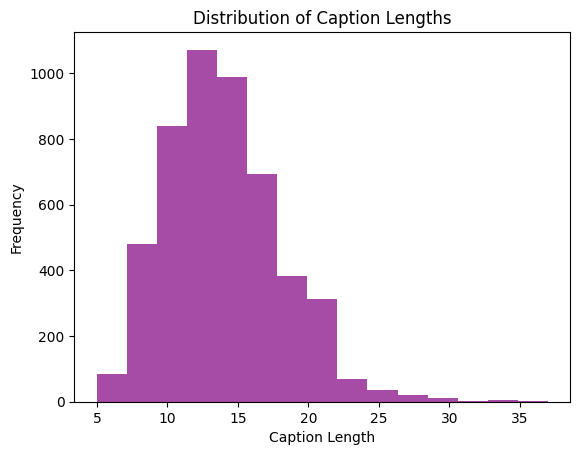

In [17]:
caption_lengths = [len(c.split()) for c in all_captions]

plt.hist(caption_lengths, bins=15, color="purple", alpha=0.7)
plt.xlabel("Caption Length")
plt.ylabel("Frequency")
plt.title("Distribution of Caption Lengths")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image Path: /content/test.jpg
Generated Caption: a young girl in a blue shirt and black pants stands in front of a go cart


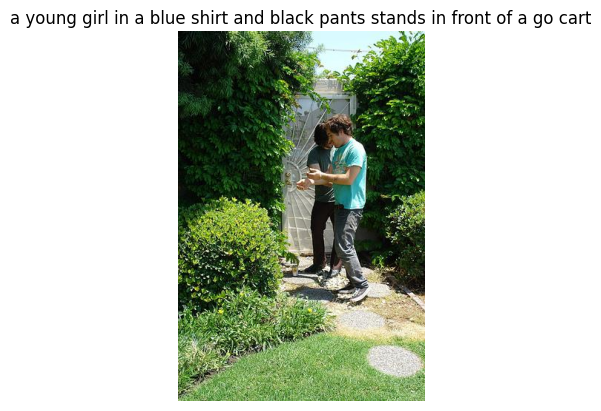

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image

def preprocess_image(image_path):
    """Preprocess image for feature extraction model."""
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

def generate_caption_for_image(image_path, model_new, captioning_model, tokenizer, max_length):
    """Generate a caption for a given image path."""
    test_img = preprocess_image(image_path)

    test_img_feature = model_new.predict(test_img).reshape(1, 2048)

    caption = generate_caption(captioning_model, test_img_feature, tokenizer, max_length)

    print(f"Image Path: {image_path}")
    print(f"Generated Caption: {caption}")

    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(caption)
    plt.show()

    return caption

# Example usage
image_path = "/content/test.jpg"
caption = generate_caption_for_image(image_path, model_new, captioning_model, tokenizer, max_length)
